In [56]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path = 'Minecraft_Screenshots_Analysis.csv'
data = pd.read_csv(data_path)

In [3]:
df = data.iloc[:, :10]

In [4]:
df.shape

(6089, 10)

In [5]:
df.head()

,screenshot_title,activity,hearts,light_lvl,in_hand_item,target_mob,decision_activity,decision_hearts,decision_light,decision_mob
0,archering (100).png,archery,11,high,bow,no_mob,give_resistance,give_regeneration_2,no_decision_for_light,no_decision_for_mob
1,archering (108).png,archery,3,high,bow,no_mob,give_resistance,give_regeneration_4,no_decision_for_light,no_decision_for_mob
2,archering (112).png,archery,3,high,bow,no_mob,give_resistance,give_regeneration_4,no_decision_for_light,no_decision_for_mob
3,archering (12).png,archery,20,high,bow,no_mob,give_resistance,no_decision_for_hearts,no_decision_for_light,no_decision_for_mob
4,archering (1546).png,archery,15,high,bow,other,give_resistance,give_regeneration_1,no_decision_for_light,no_decision_for_mob


In [6]:
label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [7]:
df.head(5)

,screenshot_title,activity,hearts,light_lvl,in_hand_item,target_mob,decision_activity,decision_hearts,decision_light,decision_mob
0,1,0,11,0,2,2,2,1,0,1
1,7,0,3,0,2,2,2,3,0,1
2,11,0,3,0,2,2,2,3,0,1
3,17,0,20,0,2,2,2,4,0,1
4,53,0,15,0,2,3,2,0,0,1


In [8]:
df['decision_mob'].value_counts()

decision_mob
1    4591
3     730
2     569
0     199
Name: count, dtype: int64

In [9]:
df.isnull().sum()

screenshot_title     0
activity             0
hearts               0
light_lvl            0
in_hand_item         0
target_mob           0
decision_activity    0
decision_hearts      0
decision_light       0
decision_mob         0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(7)

In [11]:
df.drop_duplicates(keep='first', inplace=True)

In [12]:
X = df.drop(columns=['decision_mob'])
Y = df['decision_mob']
scaler =  StandardScaler()
X = scaler.fit_transform(X)

In [13]:
X.shape

(6082, 9)

In [14]:
Y.shape

(6082,)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
x_train.shape

(4865, 9)

In [17]:
x_test.shape

(1217, 9)

In [18]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['log2', 'sqrt']
max_dept = [3,5,None]
min_samples_split = [5, 10]
min_samples_leaf = [1, 5]
bootstrap = [True, False]

In [19]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_dept,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [20]:
param_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['log2', 'sqrt'],
 'max_depth': [3, 5, None],
 'min_samples_split': [5, 10],
 'min_samples_leaf': [1, 5],
 'bootstrap': [True, False]}

In [21]:
randomForestModel = RandomForestClassifier()

In [22]:
model_grid = GridSearchCV(estimator = randomForestModel, param_grid = param_grid, cv= 3, n_jobs= -1, verbose= 2, error_score='raise')

In [23]:
model_grid.fit(x_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5, None],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [24]:
model_grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 40}

In [25]:
model_random = RandomizedSearchCV(estimator=randomForestModel, param_distributions = param_grid, n_iter=200, cv= 5, n_jobs= -1, verbose= 2)

In [26]:
model_random.fit(x_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 5],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   verbose=2)

In [27]:
random_best_params = model_random.best_params_
random_best_params

{'n_estimators': 20,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [28]:
model_grid.score(x_train, y_train)

0.9979445015416238

In [29]:
model_grid.score(x_test, y_test)

0.9909613804437141

In [30]:
model_random.score(x_train, y_train)

0.9975334018499487

In [31]:
model_random.score(x_test, y_test)

0.9884963023829088

In [32]:
randomForestModel.set_params(**random_best_params)

RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_samples_split=10, n_estimators=20)

In [33]:
randomForestModel.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_samples_split=10, n_estimators=20)

In [34]:
y_pred = randomForestModel.predict(x_test)

In [60]:
y_prob = randomForestModel.predict_proba(x_test)

In [61]:
accuracy = randomForestModel.score(x_test, y_test)
accuracy

0.9884963023829088

In [62]:
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
roc_auc

np.float64(0.9998081569797508)

In [36]:
print("Classification Report : \n",classification_report(y_test, y_pred))


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.99      1.00      0.99       924
           2       1.00      0.99      0.99       100
           3       0.99      0.92      0.96       154

    accuracy                           0.99      1217
   macro avg       0.99      0.98      0.99      1217
weighted avg       0.99      0.99      0.99      1217



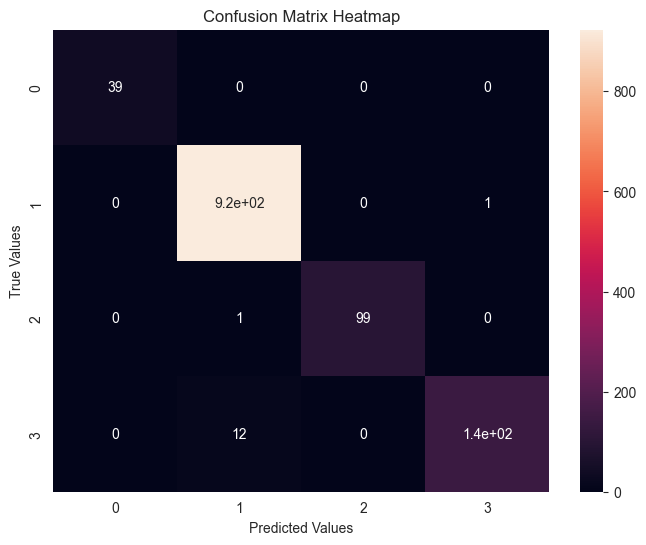

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()


In [38]:
logisticRegressionModel = LogisticRegression() 

In [39]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  
    'C': [0.01, 0.1, 1, 10],
    'solver': ['saga'], 
    'max_iter': [500, 1000, 1500],
    'l1_ratio': [0.1, 0.5, 0.9]    
}

In [40]:
model_grid = GridSearchCV(estimator = logisticRegressionModel, param_grid = param_grid, cv= 3, n_jobs= -1, verbose= 2, error_score='raise')

In [41]:
model_grid.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


D:\PycharmProjects\PAI\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
D:\PycharmProjects\PAI\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=3, error_score='raise', estimator=LogisticRegression(),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9],
                         'max_iter': [500, 1000, 1500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga']},
             verbose=2)

In [42]:
grid_best_params = model_grid.best_params_
grid_best_params

{'C': 10, 'l1_ratio': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}

In [43]:
model_random = RandomizedSearchCV(estimator=logisticRegressionModel, param_distributions = param_grid, cv= 5, n_jobs= -1, verbose= 2)

In [44]:
model_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\PycharmProjects\PAI\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'l1_ratio': [0.1, 0.5, 0.9],
                                        'max_iter': [500, 1000, 1500],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['saga']},
                   verbose=2)

In [45]:
random_best_params = model_random.best_params_
random_best_params

{'solver': 'saga',
 'penalty': 'elasticnet',
 'max_iter': 500,
 'l1_ratio': 0.1,
 'C': 10}

In [46]:
model_grid.score(x_train, y_train)

0.8918807810894142

In [47]:
model_grid.score(x_test, y_test)

0.8800328677074774

In [48]:
model_random.score(x_train, y_train)

0.8910585817060637

In [49]:
model_random.score(x_test, y_test)

0.8800328677074774

In [50]:
logisticRegressionModel.set_params(**random_best_params)

LogisticRegression(C=10, l1_ratio=0.1, max_iter=500, penalty='elasticnet',
                   solver='saga')

In [51]:
logisticRegressionModel.fit(x_train, y_train)

LogisticRegression(C=10, l1_ratio=0.1, max_iter=500, penalty='elasticnet',
                   solver='saga')

In [52]:
y_pred = logisticRegressionModel.predict(x_test)

In [63]:
y_prob = logisticRegressionModel.predict_proba(x_test)

In [53]:
accuracy = logisticRegressionModel.score(x_test, y_test)
accuracy

0.8800328677074774

In [65]:
ruc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
ruc_auc

np.float64(0.9614568029682969)

In [54]:
print("Classification Report : \n",classification_report(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.91      0.95      0.93       924
           2       0.66      0.56      0.61       100
           3       0.75      0.66      0.70       154

    accuracy                           0.88      1217
   macro avg       0.83      0.79      0.81      1217
weighted avg       0.87      0.88      0.88      1217



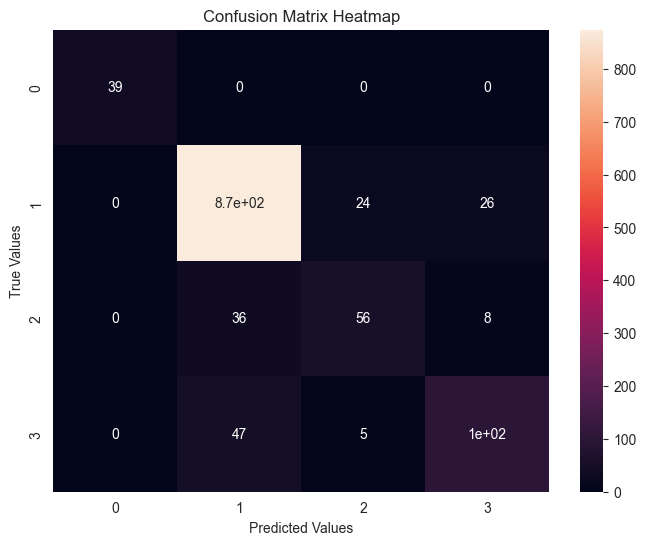

In [55]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [68]:
comparison = {
    'Algorithm': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [0.99, 0.88],
    'Precision': [0.99, 0.87],
    'Recall': [0.99, 0.88],
    'F1-Score': [0.99, 0.88],
    'ROC AUC': [0.99, 0.96],
    'Best hyperparameters': ["n_estimators: 20, min_samples_split: 10, min_samples_leaf: 1, max_features: log2, max_depth: None, bootstrap: False", 
                             "solver: saga, penalty: elasticnet, max_iter: 500, l1_ratio: 0.1, C: 10"],
    'Execution time (s)': [66, 38],
    'Remarks': [0, 0]
}

In [69]:
table = pd.DataFrame(comparison)
table

,Algorithm,Accuracy,Precision,Recall,F1-Score,ROC AUC,Best hyperparameters,Execution time (s),Remarks
0,Random Forest,0.99,0.99,0.99,0.99,0.99,"n_estimators: 20, min_samples_split: 10, min_s...",66,0
1,Logistic Regression,0.88,0.87,0.88,0.88,0.96,"solver: saga, penalty: elasticnet, max_iter: 5...",38,0
